# Udacity Bertelsmann Data Science Challenge

---



This Jupyter notebook is used by the HealthHackers group to collaborate on the Python code for classifying patients into risk groups for the Bertelsmann-Udacity Project Showcase Challenge.


## Python Implementation

---



**1. Upload the dataset from your local drive**





In [1]:
'''
Load proj_two_data.csv from your local drive
'''

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving proj_two_data.csv to proj_two_data.csv
User uploaded file "proj_two_data.csv" with length 32760 bytes


**2. Load the CSV file into data structure**

In [0]:
import csv

count = 0

'''
  Load the csv file into a nested list 
'''
with open("proj_two_data.csv", 'r') as f:
  reader = csv.reader(f)
  file_data = list(reader)

**3. Define function for analyzing the data**

In [0]:
def analyze_data(row_data):
  
  if row_data['flt3_allelic_ratio'] != 'Not Done' and float(row_data['flt3_allelic_ratio']) > 0.4:
    row_data['riskcause']= 'flt3'
    return 'high'
  elif row_data['npm'] == 'Mutated':
    row_data['riskcause']= 'npm'
    return 'low'
  elif row_data['down_syndrome'] == 1 and int(row_data['age']) >= 4:
    row_data['riskcause']= 'down_syndrome'
    return 'low'
  elif row_data['abnormalities'] == '':
    return 'standard'
  else:
    #row_data['riskcause']= 'abnormality in karyotype'
    for sub_idx in range(len(row_data['abnormalities'])):
      abnormality = row_data['abnormalities'][sub_idx]
      if 'inv(16)' in abnormality:
        row_data['riskcause']= 'inv(16)'
        return 'low'
      elif 't(8;21)' in abnormality:
        row_data['riskcause']= 't(8;21)'
        return 'low'
      elif abnormality == '-7q':
        row_data['riskcause']= '-7q'
        return 'high'
      elif abnormality == '-7':
        row_data['riskcause']= '-7'
        return 'high'
      elif abnormality == '-5q':
        row_data['riskcause']= '-5q'
        return 'high'
      elif abnormality == '-5':
        row_data['riskcause']= '-5'
        return 'high' 
      elif len(set(row_data['abnormalities'])) >= 4:
        row_data['riskcause']= 'four abnormalities and higher'
        return 'high' 
  row_data['riskcause']= 'not low not high'
  return 'standard'

**4. Define function for processing the data**

In [0]:
def process_and_analyze_data(data):
  processed_data = dict()
  
  for idx in range(1, len(data)):
    row_data = dict()
    
    pieces = len(data[idx])
    temp = [x.strip() for x in data[idx][0].split(',')]
    temp[len(temp)-1] = temp[len(temp)-1].split('[')[0]
    if len(temp) > 1:
      row_data['abnormalities'] = temp[2:len(temp)]

      row_data['npm'] = data[idx][pieces-1]
      row_data['age'] = data[idx][pieces-2]
      row_data['down_syndrome'] = data[idx][pieces-3]
      row_data['flt3_allelic_ratio'] = data[idx][pieces-4]

      row_data['risk'] = analyze_data(row_data)
    else:
      row_data['riskcause']= 'Chromosome row in Karyotype'
      row_data['risk'] = 'no risk'
    processed_data[idx] = row_data
  
  return processed_data


**5. Identify risk classification by running code for processing and analyzing the data **

In [5]:
processed_data = process_and_analyze_data(file_data)

'''
Print processed data
'''

#list containing all risks 
riskList = []
riskCause = []

for key, value in processed_data.items():
  riskList.append(value['risk'])
  riskCause.append(value['riskcause'])
  print(key, value['risk'], value['riskcause'])


1 low t(8;21)
2 low t(8;21)
3 low inv(16)
4 standard not low not high
5 standard not low not high
6 standard not low not high
7 low t(8;21)
8 high flt3
9 low t(8;21)
10 low t(8;21)
11 standard not low not high
12 low inv(16)
13 standard not low not high
14 high flt3
15 standard not low not high
16 low t(8;21)
17 standard not low not high
18 standard not low not high
19 high four abnormalities and higher
20 standard not low not high
21 high four abnormalities and higher
22 high flt3
23 high flt3
24 low inv(16)
25 standard not low not high
26 high four abnormalities and higher
27 standard not low not high
28 high four abnormalities and higher
29 standard not low not high
30 high four abnormalities and higher
31 low inv(16)
32 standard not low not high
33 low inv(16)
34 standard not low not high
35 standard not low not high
36 high four abnormalities and higher
37 low t(8;21)
38 low npm
39 low t(8;21)
40 standard not low not high
41 standard not low not high
42 high flt3
43 high four abno

**6. Descriptive Statistics**

In [6]:
import pandas as pd 
df = pd.read_csv("proj_two_data.csv")
print(df.describe())

       Down syndrome         Age
count     504.000000  504.000000
mean        0.001984    7.406548
std         0.044544    5.020865
min         0.000000    0.100000
25%         0.000000    2.800000
50%         0.000000    6.500000
75%         0.000000   11.700000
max         1.000000   18.500000


**7. Finding the coorelation between the age and risk of patients**
Motivated by https://stackoverflow.com/questions/44694228/how-to-check-for-correlation-among-continuous-and-categorical-variables-in-pytho

In [7]:
#Converting the dict type as dataframe 
import pandas as pd 
import numpy as np

dataframe_data = pd.read_csv("proj_two_data.csv")

dataframe_data['risk'] = riskList

dataframe_data = dataframe_data.drop('Karyotype', 1)

dataframe_data = dataframe_data.drop('FLT3 Allelic Ratio', 1)
dataframe_data = dataframe_data.drop('Down syndrome', 1)
dataframe_data = dataframe_data.drop('Nucleophosmin (NPM)', 1)

df_dummies = pd.get_dummies(dataframe_data['risk'])

del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([dataframe_data, df_dummies], axis=1)

del df_new['risk']

x = df_new.values

correlation_matrix = np.corrcoef(x.T)
print("Correlation matrix between Age, High, Low and Standard")
print(correlation_matrix)

Correlation matrix between Age, High, Low and Standard
[[ 1.         -0.04116673  0.14318749 -0.0231208 ]
 [-0.04116673  1.         -0.36005764 -0.06773637]
 [ 0.14318749 -0.36005764  1.         -0.06404305]
 [-0.0231208  -0.06773637 -0.06404305  1.        ]]


**8. Visualizing Data**

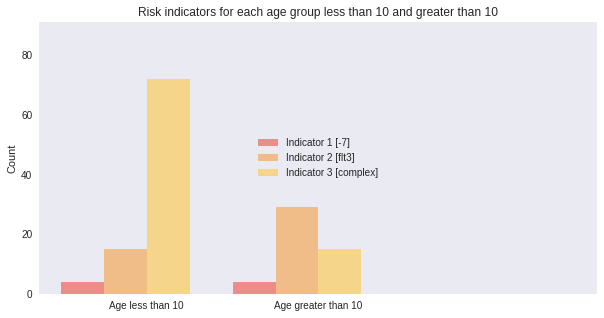

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''create the dataframe '''
raw_data = {'risk': ['Age less than 10', 'Age greater than 10', ''],
        'cause1': [4, 4, 0],
        'cause2': [15, 29, 0],
        'cause3': [72, 15, 0]}
df = pd.DataFrame(raw_data, columns = ['risk', 'cause1', 'cause2', 'cause3'])

# Setting the positions and width for the bars
pos = list(range(len(df['cause1']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['cause1'] data,
        df['cause1'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in risk
        label=df['risk'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['cause2'] data,
        df['cause2'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in risk
        label=df['risk'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['cause3'] data,
        df['cause3'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in risk
        label=df['risk'][2]) 

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Risk indicators for each age group less than 10 and greater than 10')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['risk'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['cause1'] + df['cause2'] + df['cause3'])] )

# Adding the legend and showing the plot
plt.legend(['Indicator 1 [-7] ', 'Indicator 2 [flt3]', 'Indicator 3 [complex]'], loc='center')
plt.grid()
plt.show()

**Age wise FLT high risk plot**

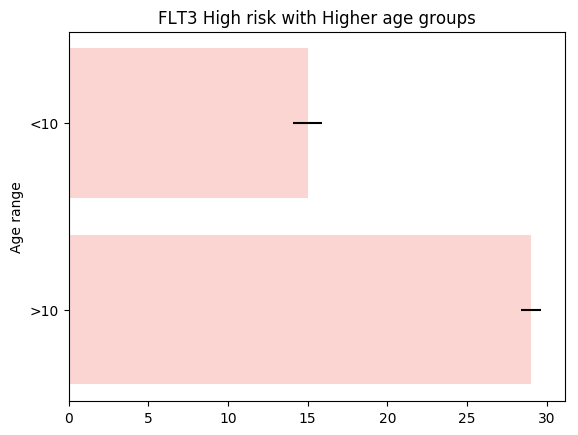

In [9]:
"""
====================
Horizontal bar chart
====================

This example showcases a simple horizontal bar chart.
"""
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('<10', '>10')
y_pos = np.arange(len(people))
performance = (15, 29)
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='#fbd5d2', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Age range')
ax.set_title('FLT3 High risk with Higher age groups')

plt.show()

**Code to download CSV from dataframe**

In [0]:
import pandas as pd 
#dataframe created from dict 
dataframe_data = pd.DataFrame.from_dict(processed_data)
#dataframe_data.to_csv(processed_file, sep='\t', encoding='utf-8')
from google.colab import files

dataframe_data.to_csv('df.csv')
files.download('df.csv')